# Projet 6 - Détectez des faux billets

## Partie I - Importation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import P6_01b_OCR6 as OCR

from scipy.cluster.hierarchy import linkage, fcluster, cophenet, dendrogram

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(color_codes = True)
#sns.set(style="whitegrid")

In [2]:
_FONTSIZE_ = 18
_FONTSIZETITLE_ = 24

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

In [3]:
df = pd.read_csv('Data/notes.csv')
df.loc[df['is_genuine'] == True, 'is_genuine'] = 1
df.loc[df['is_genuine'] == False, 'is_genuine'] = 0

In [4]:
df_X = df.iloc[:, 1:]
df_Y = df.iloc[:, 0]

## Partie II - Analyse exploratoire

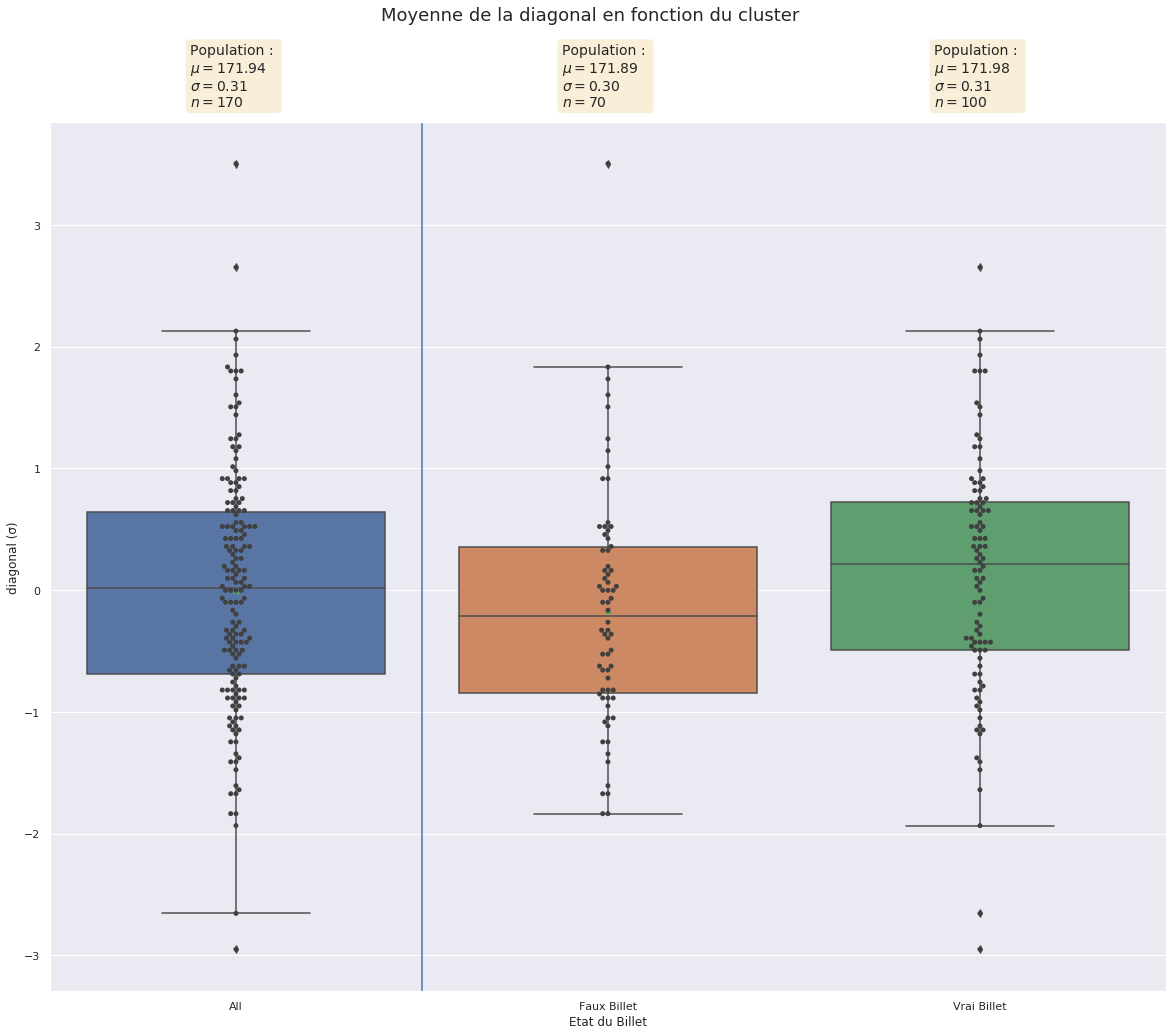

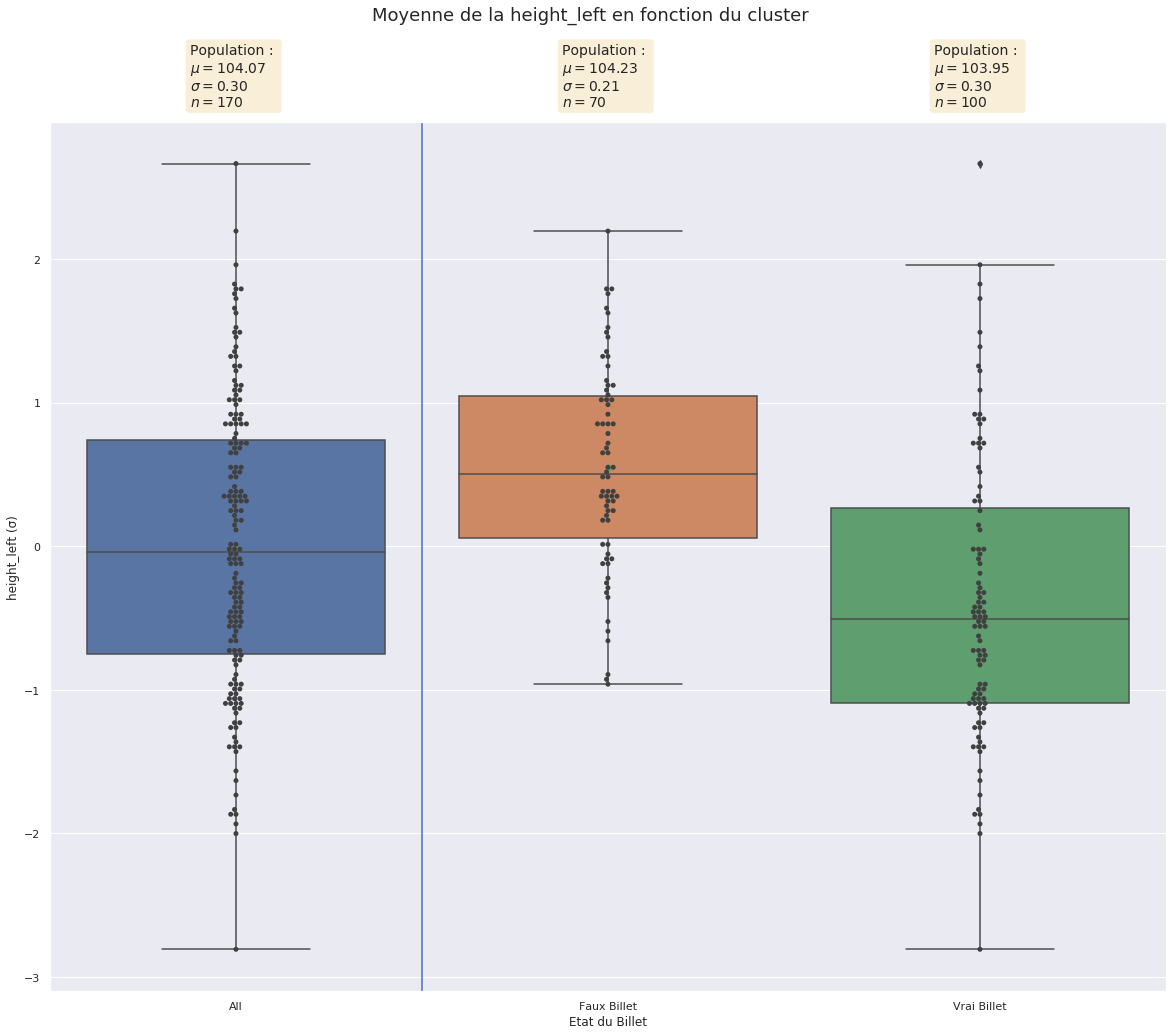

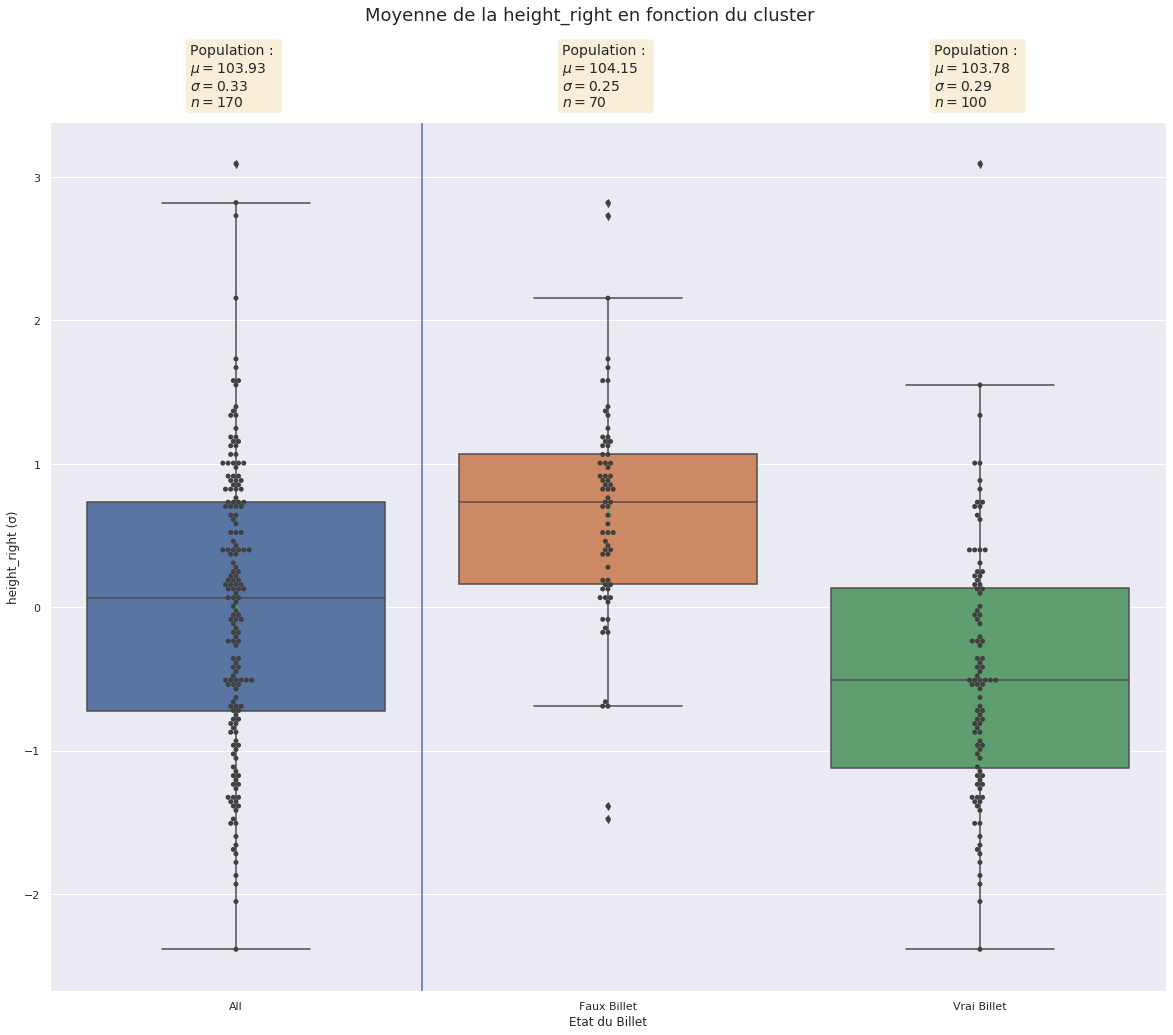

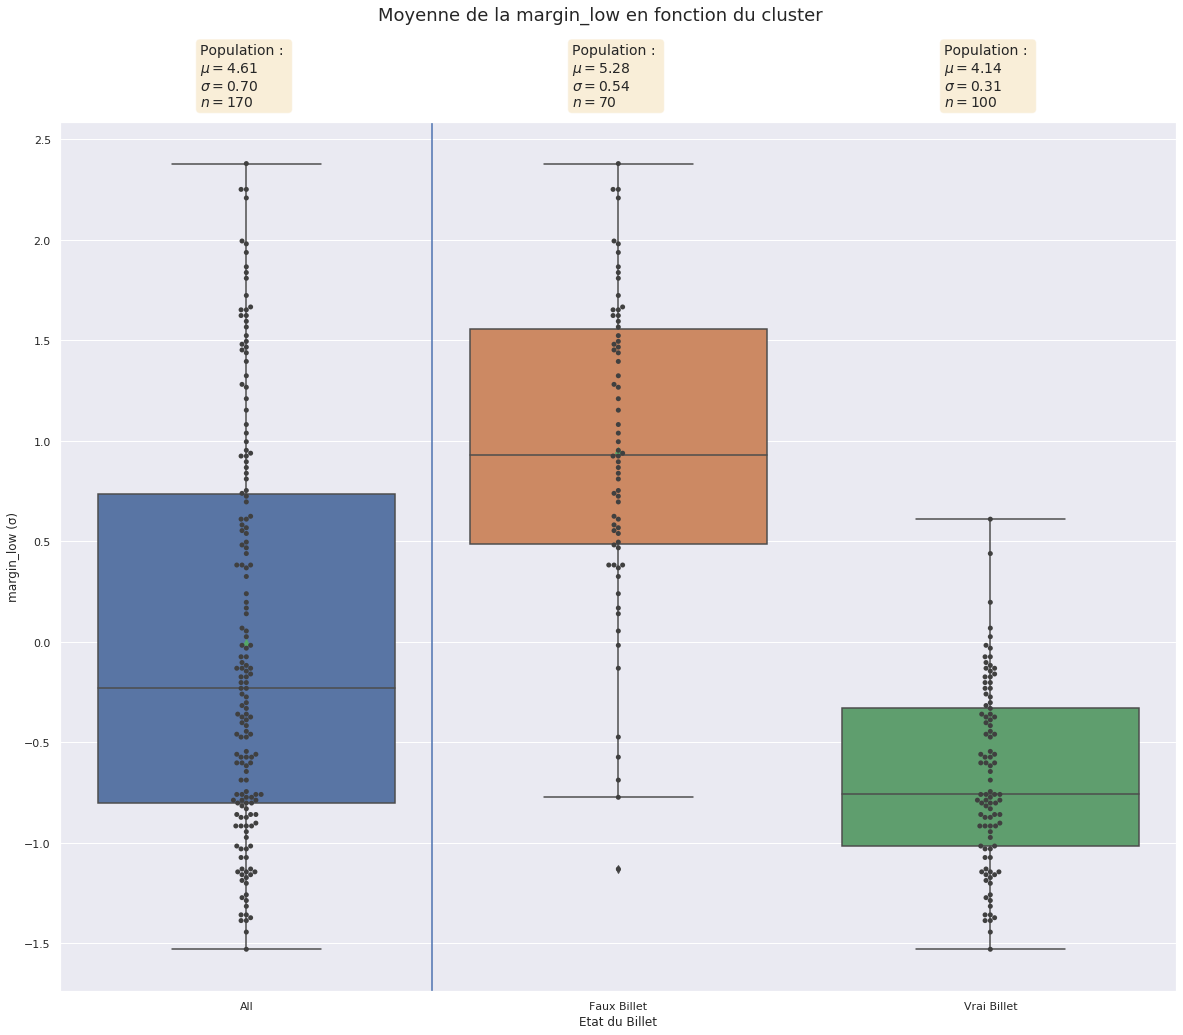

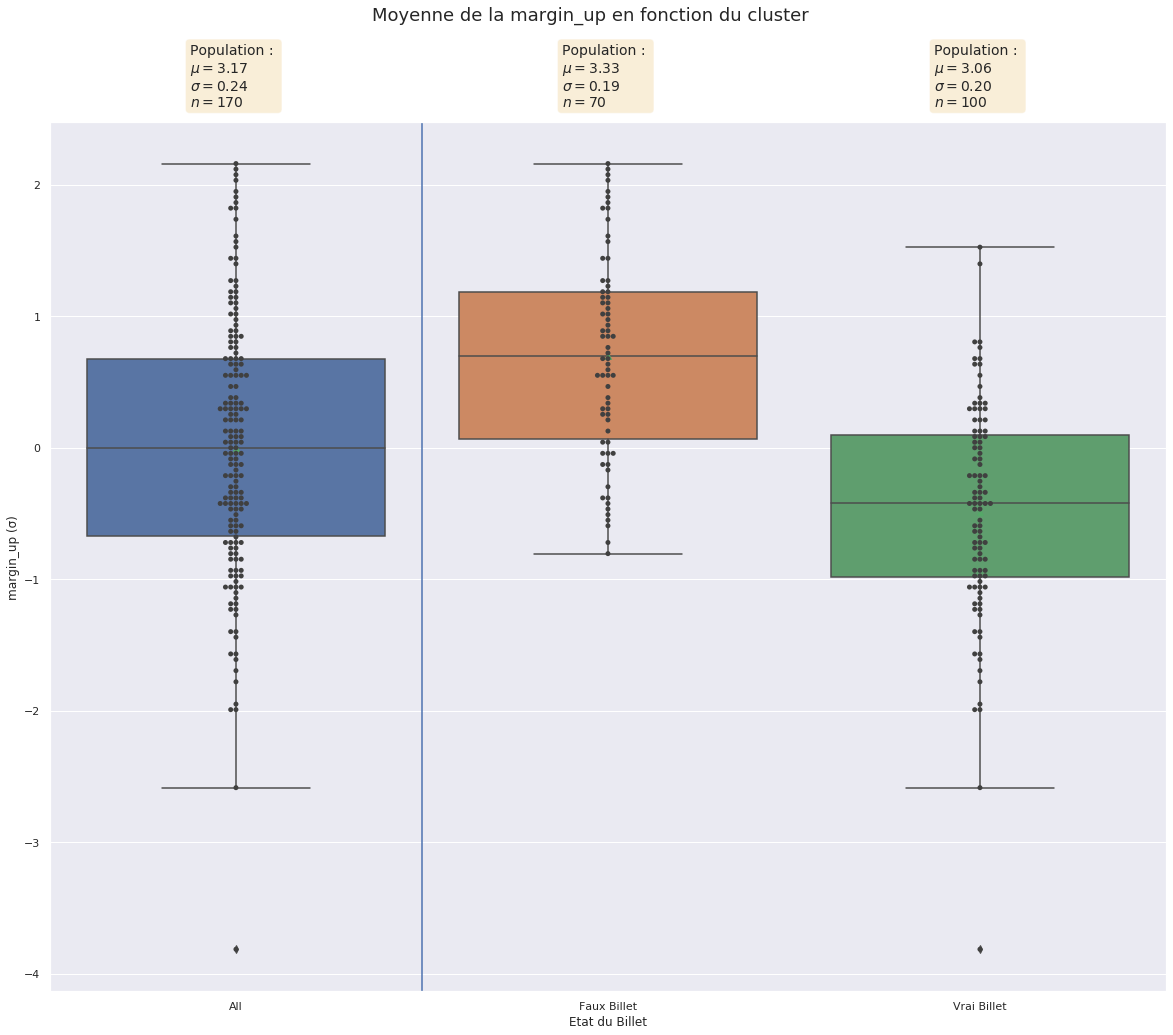

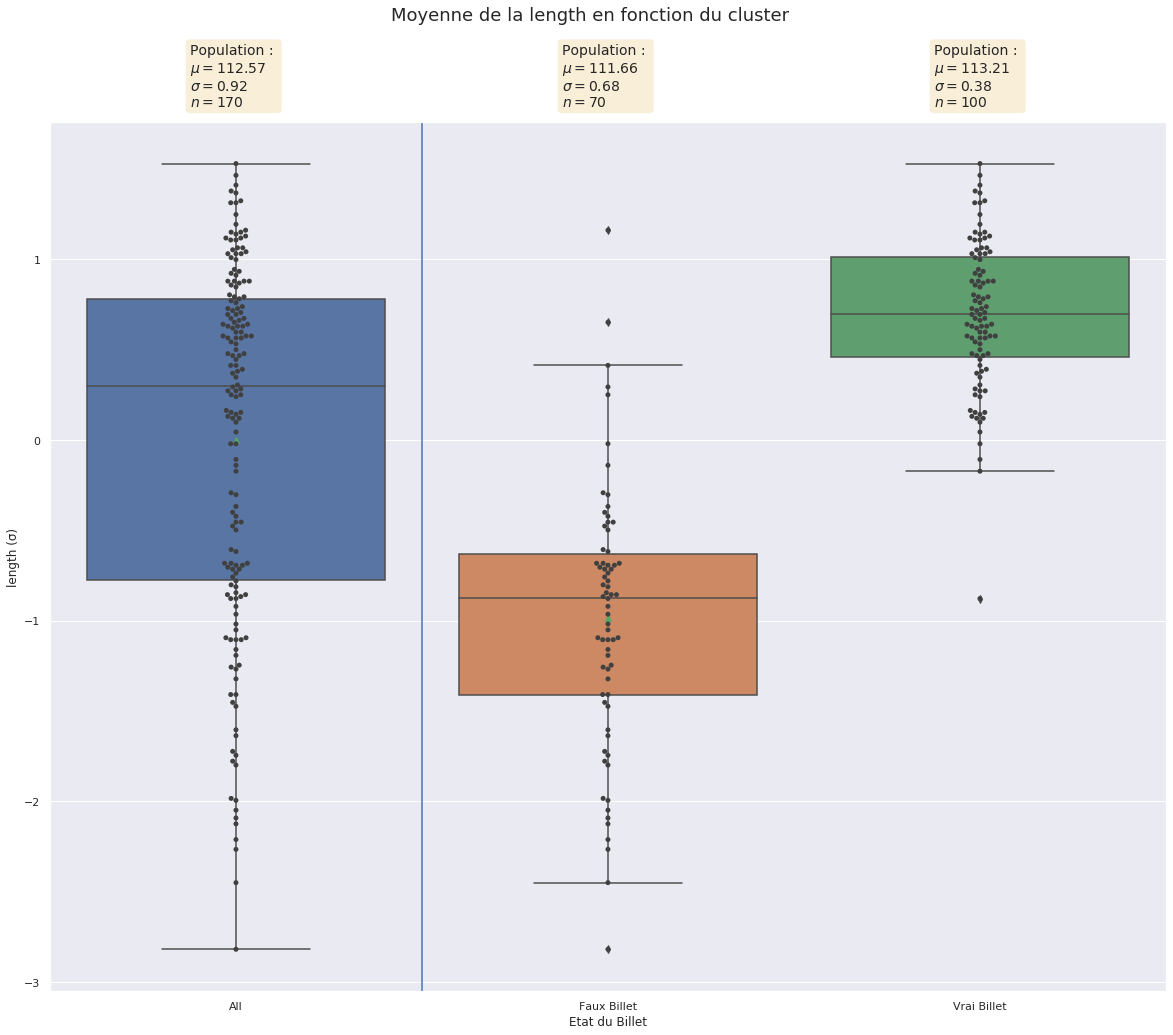

In [5]:
OCR.plotbox(df)

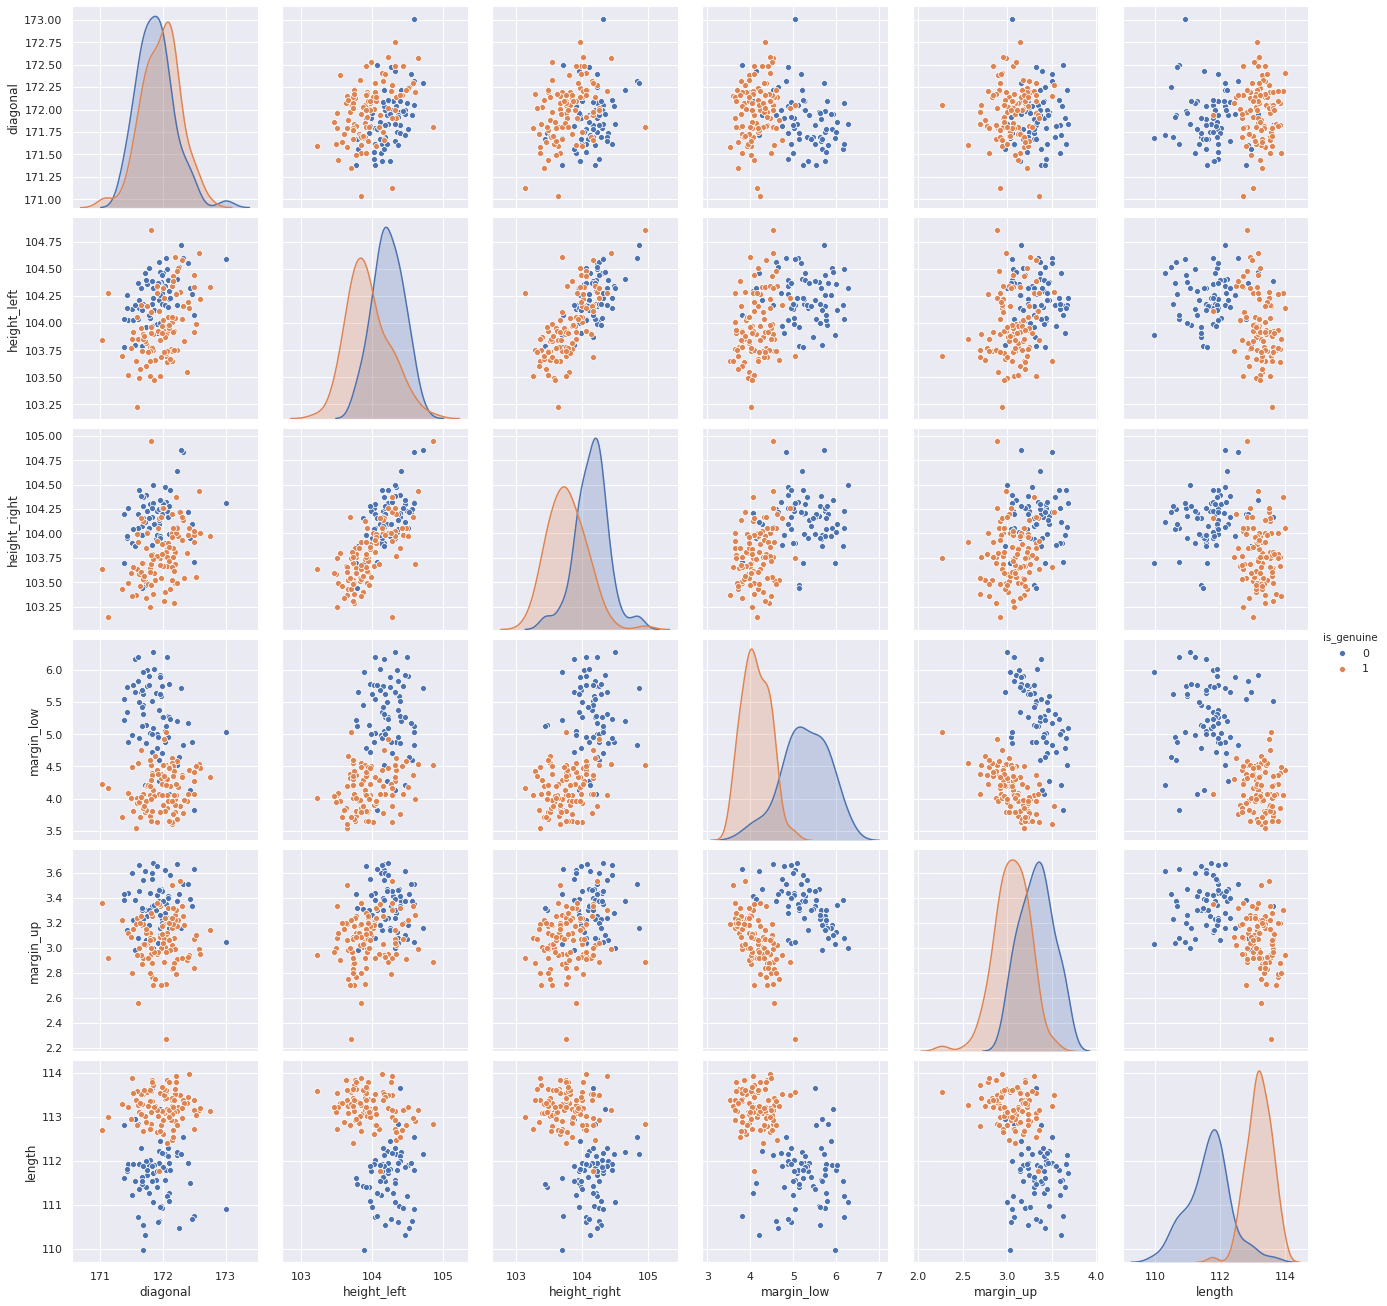

In [6]:
data_bivarie = pd.DataFrame(data=df)
sns.pairplot(df, hue='is_genuine', height=3)

plt.savefig('Images/carac_paires.png')

## Partie III - Réalisation de l'ACP

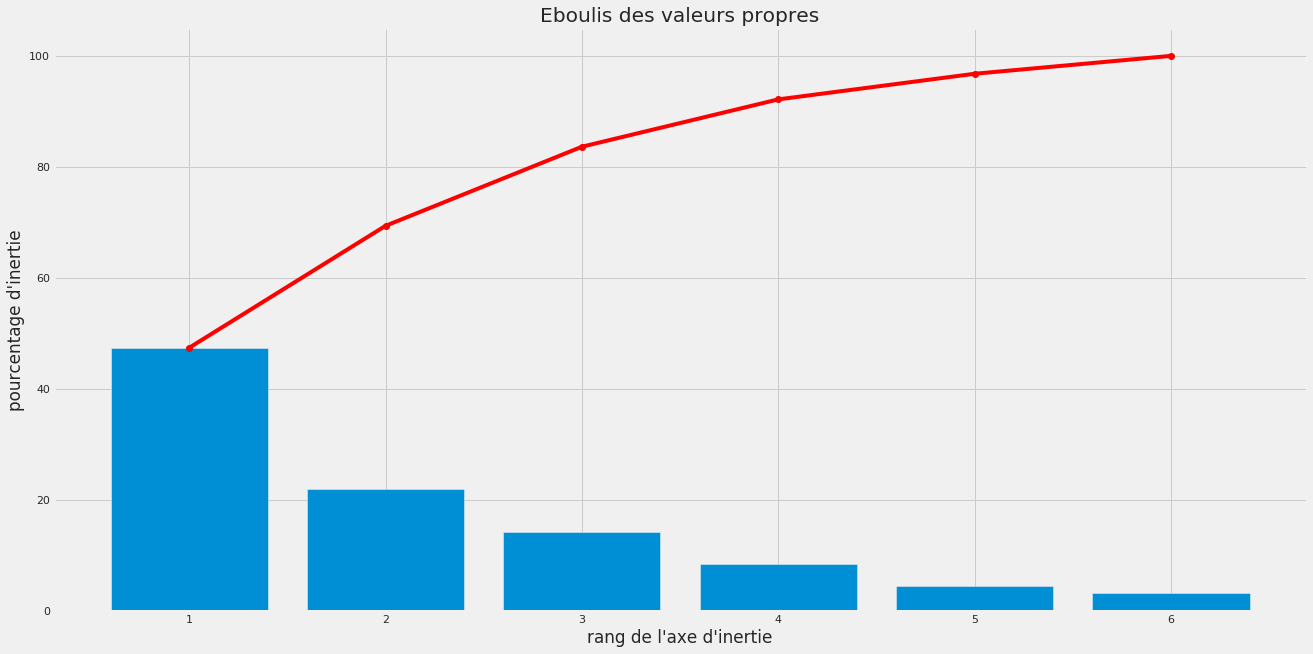

In [51]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# préparation des données pour l'ACP
X = data_pca.values
names = data_pca.index #pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)
plt.show()

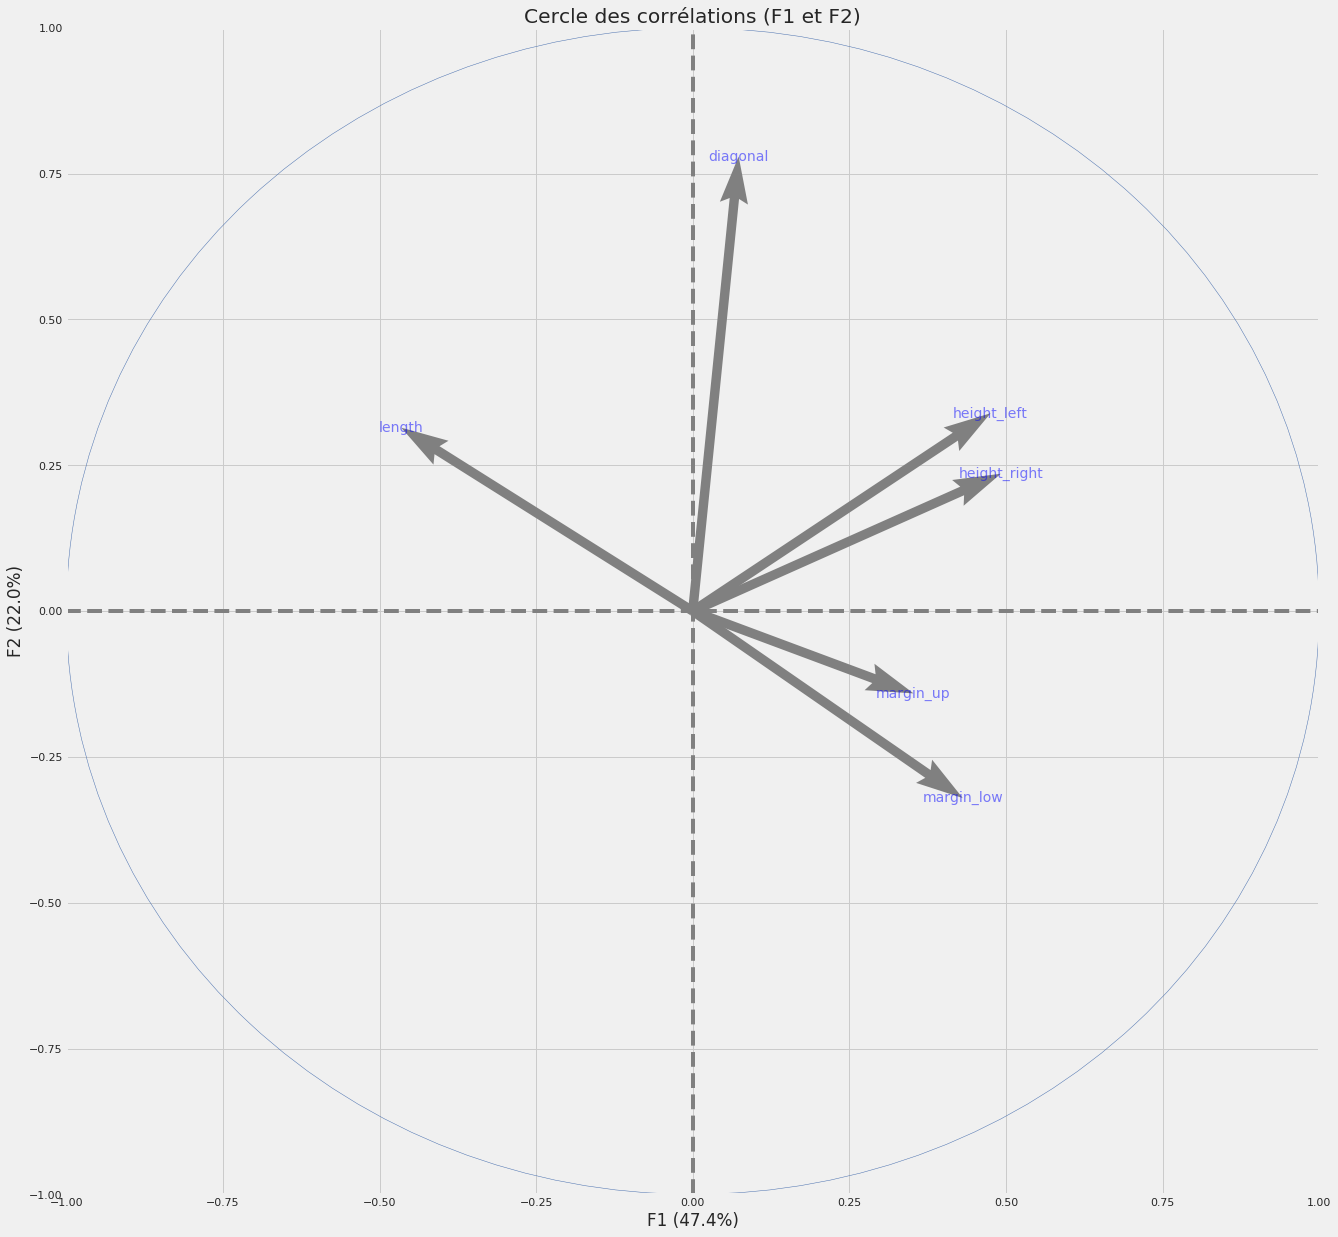

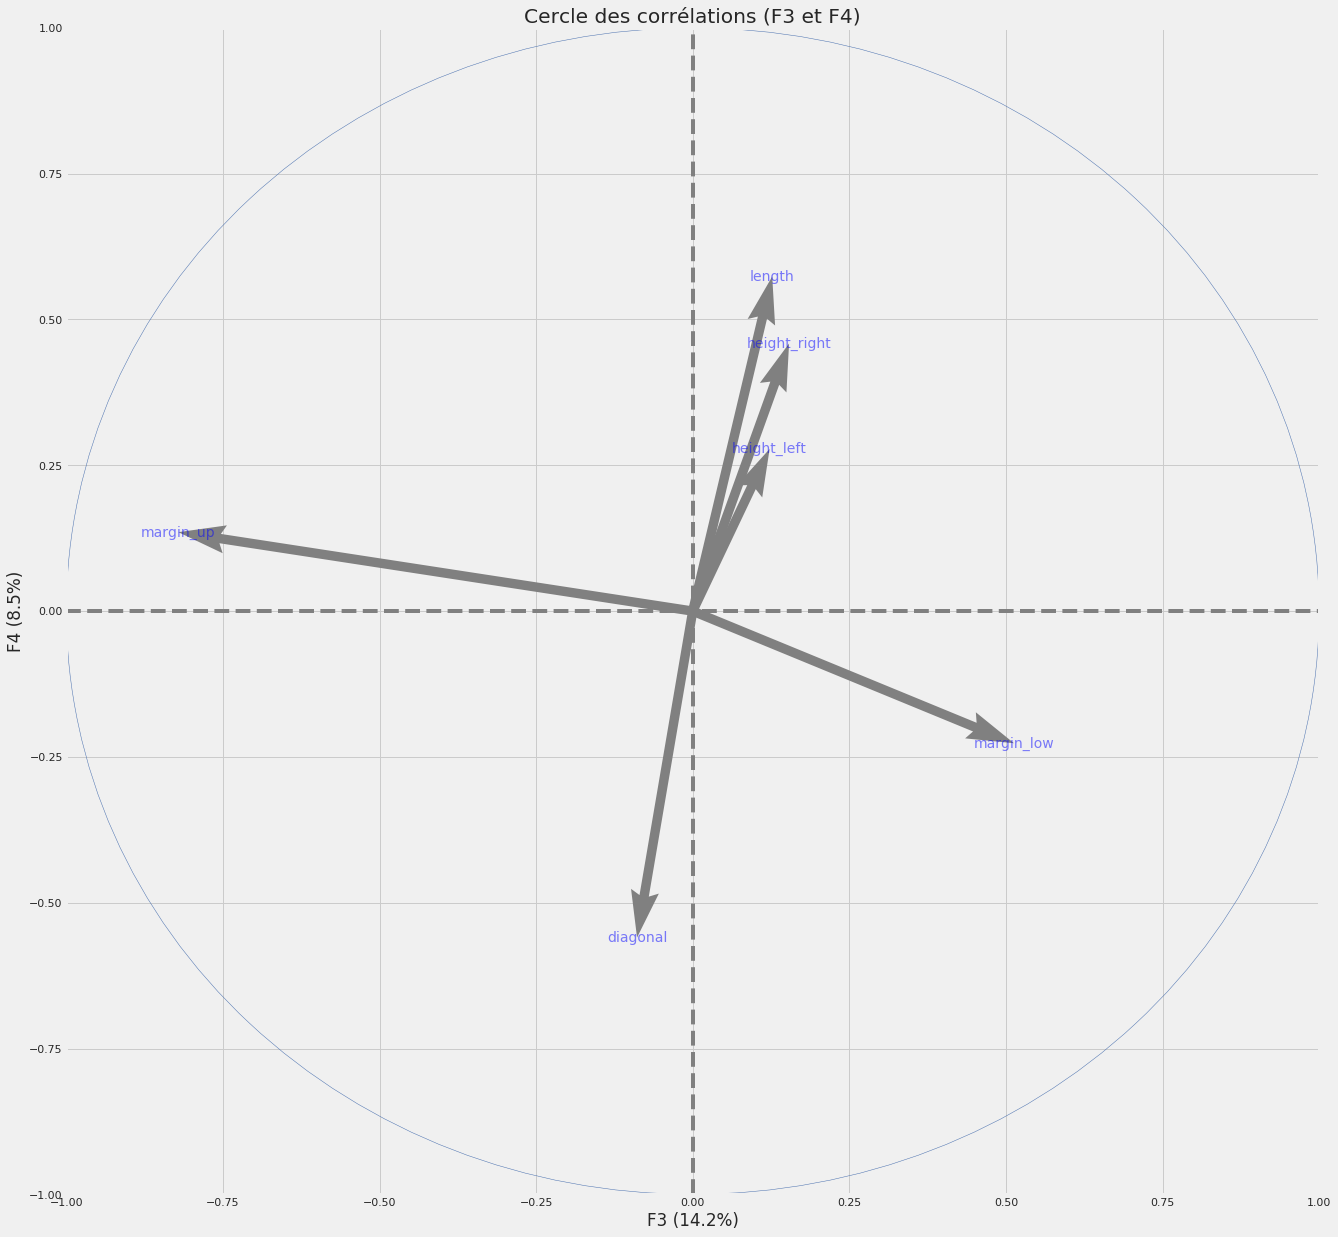

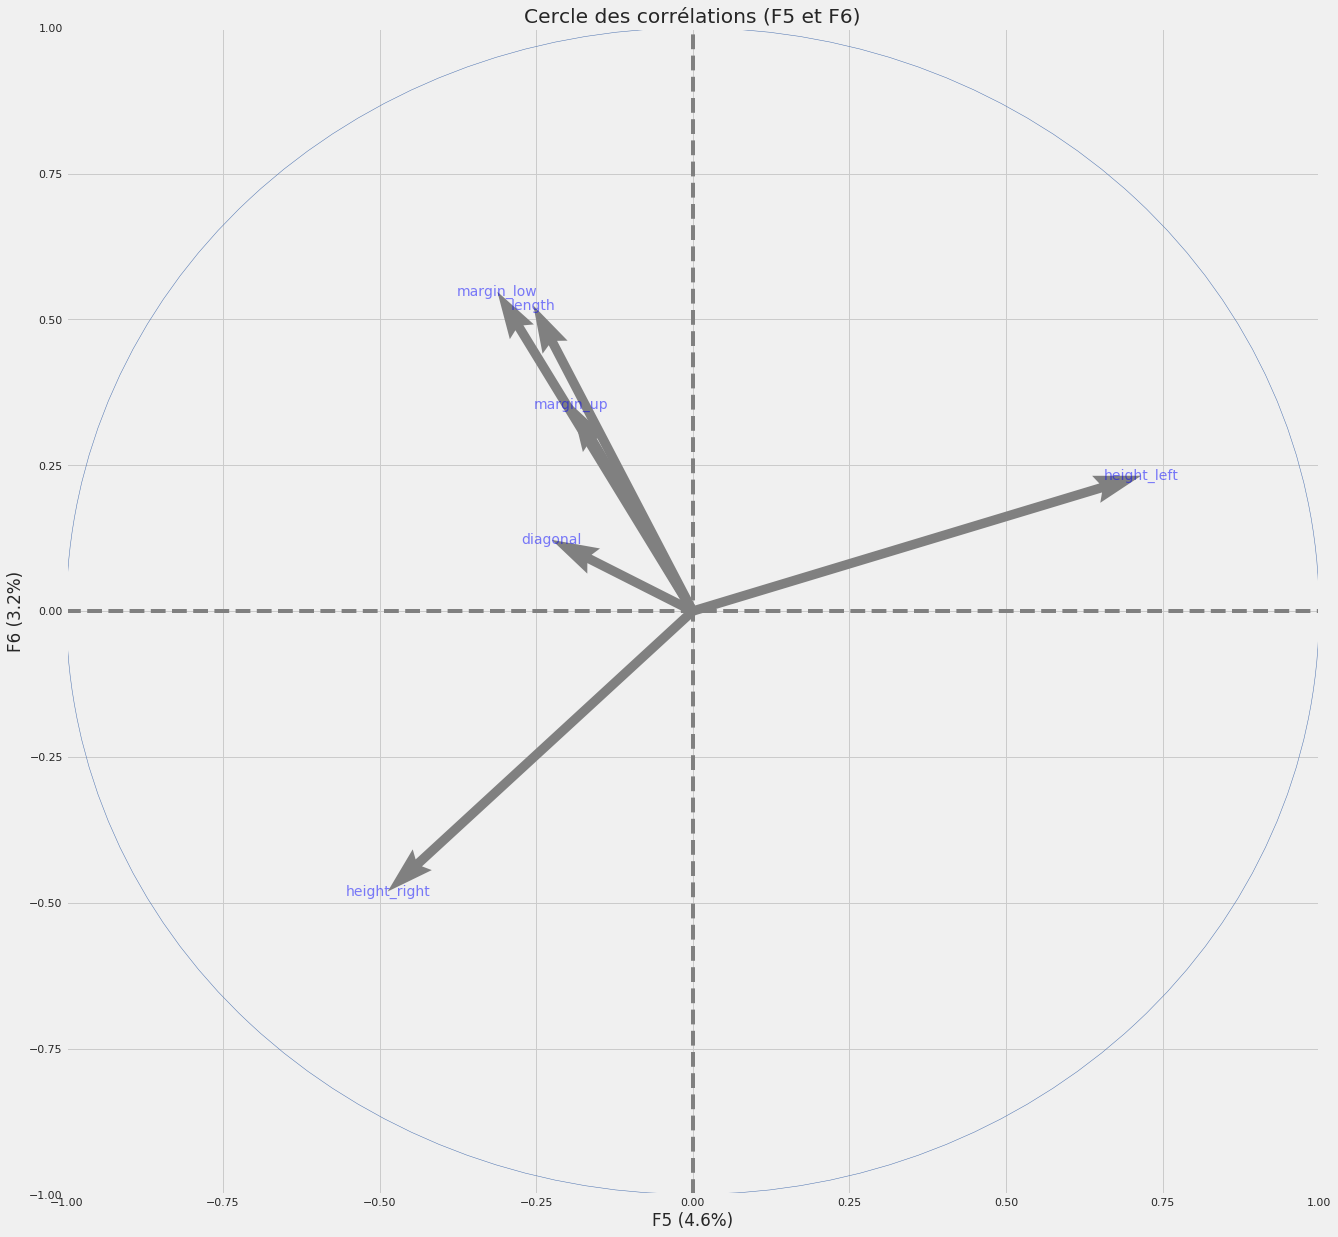

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


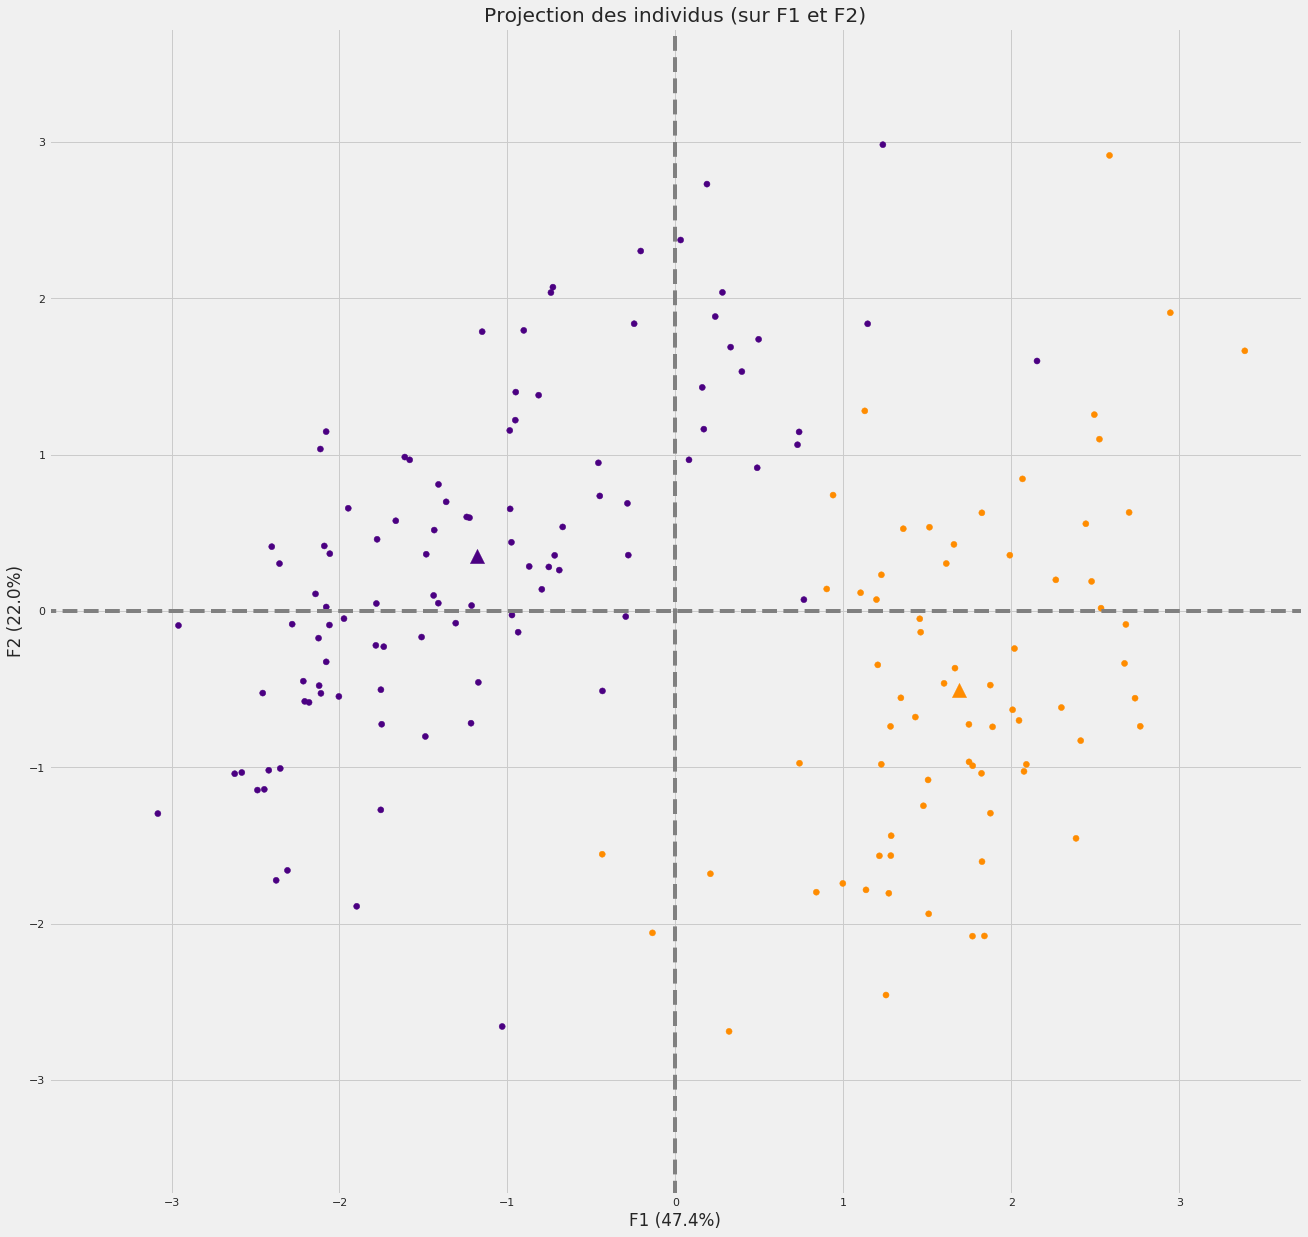

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


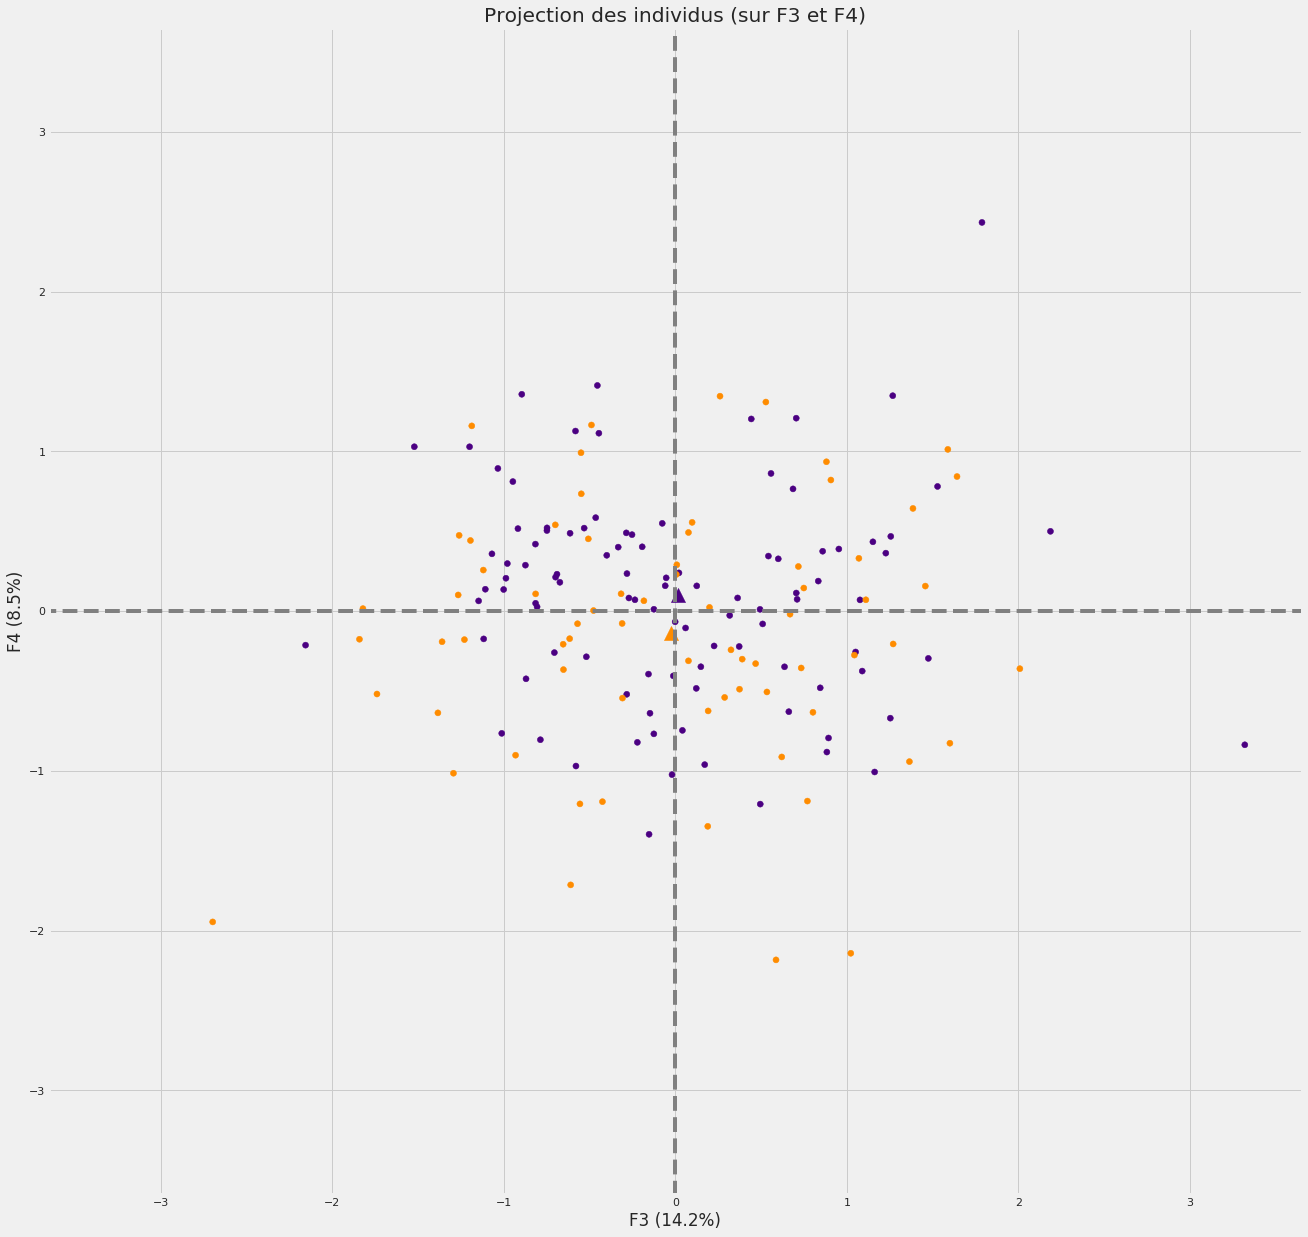

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


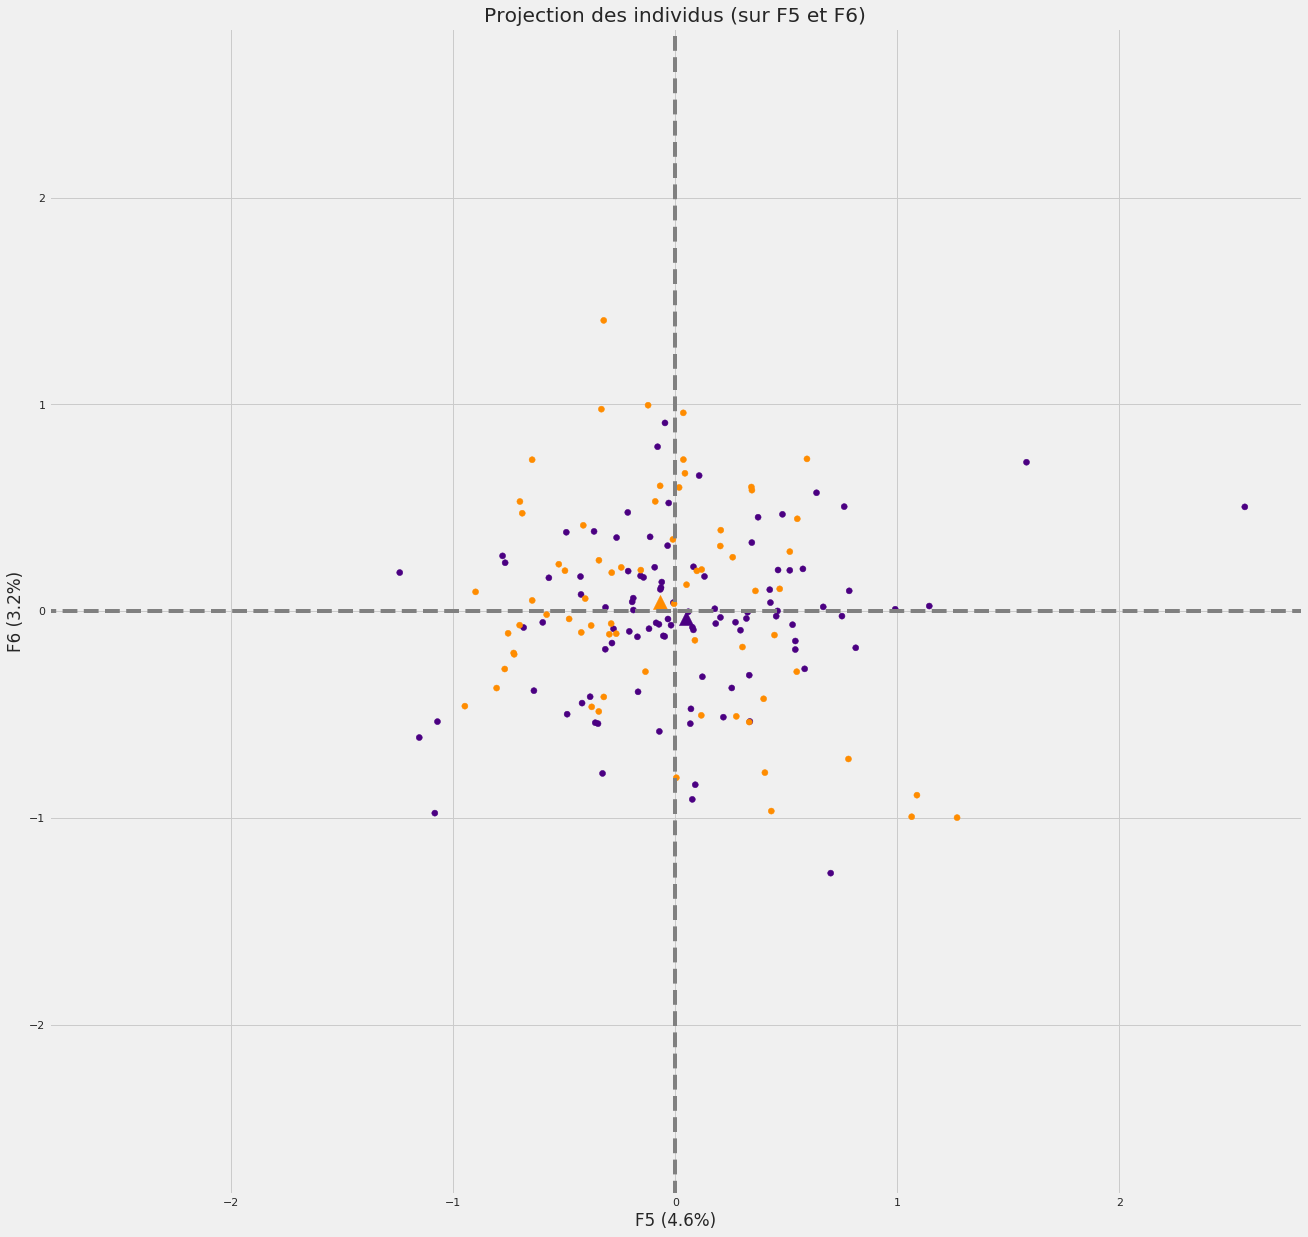

In [52]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], df['is_genuine'].astype(int))#, labels = np.array(names))

## Partie IV - Clustering

### Préparation des données - Centrage et Réduction

In [9]:
# préparation des données pour le clustering
X = df_X.values
names = df_Y.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### Validation du nombre de Cluster

In [10]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    }

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    score = metrics.silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

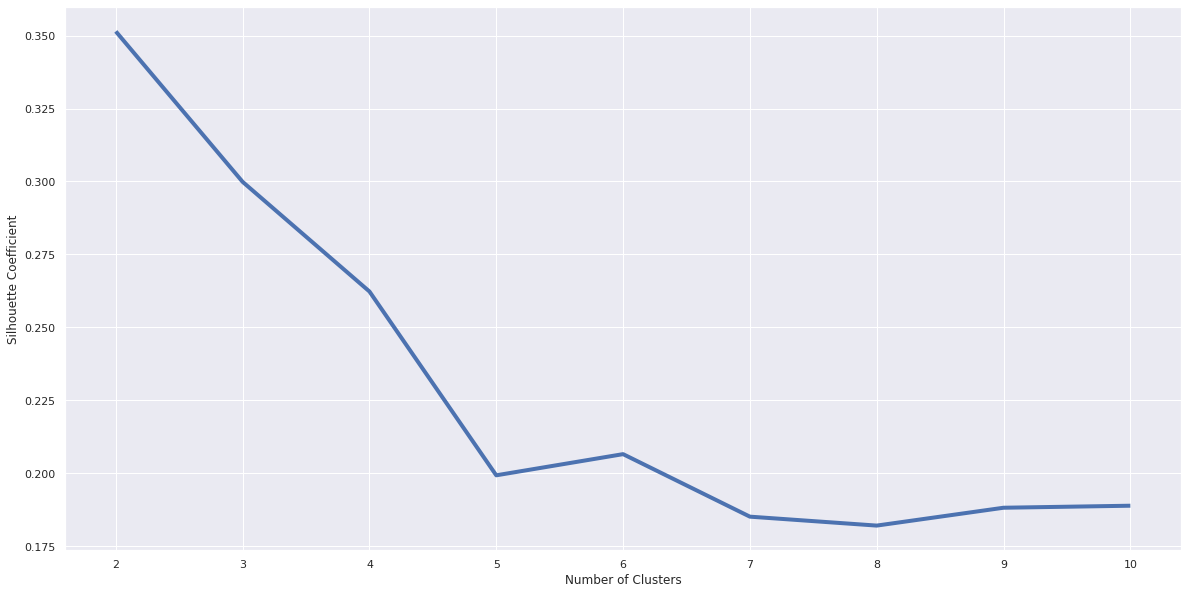

In [11]:
fig = plt.subplots(figsize = (20, 10))

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Nous constatons que le score de silhouette est maximal avec 2 clusters. Ce qui corresponds à la réalité du DataSet.

In [12]:
__CLUSTER__ = 2

### Réalisation du clustering

In [13]:
kmeans = KMeans(init='random', n_clusters=__CLUSTER__, n_init=10, max_iter=300).fit(df_X)

In [14]:
df_X['clusters'] = kmeans.labels_

### Affichage et calcul de centroïde

In [15]:
pd.DataFrame(kmeans.cluster_centers_, columns = [['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']])

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.890725,104.226667,104.146087,5.275362,3.332899,111.625217
1,171.974653,103.956832,103.779208,4.159010,3.059406,113.216139


### Réalisation de l'ACP

In [53]:
# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP

data_pca = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# préparation des données pour l'ACP
X = data_pca.values
names = data_pca.index #pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

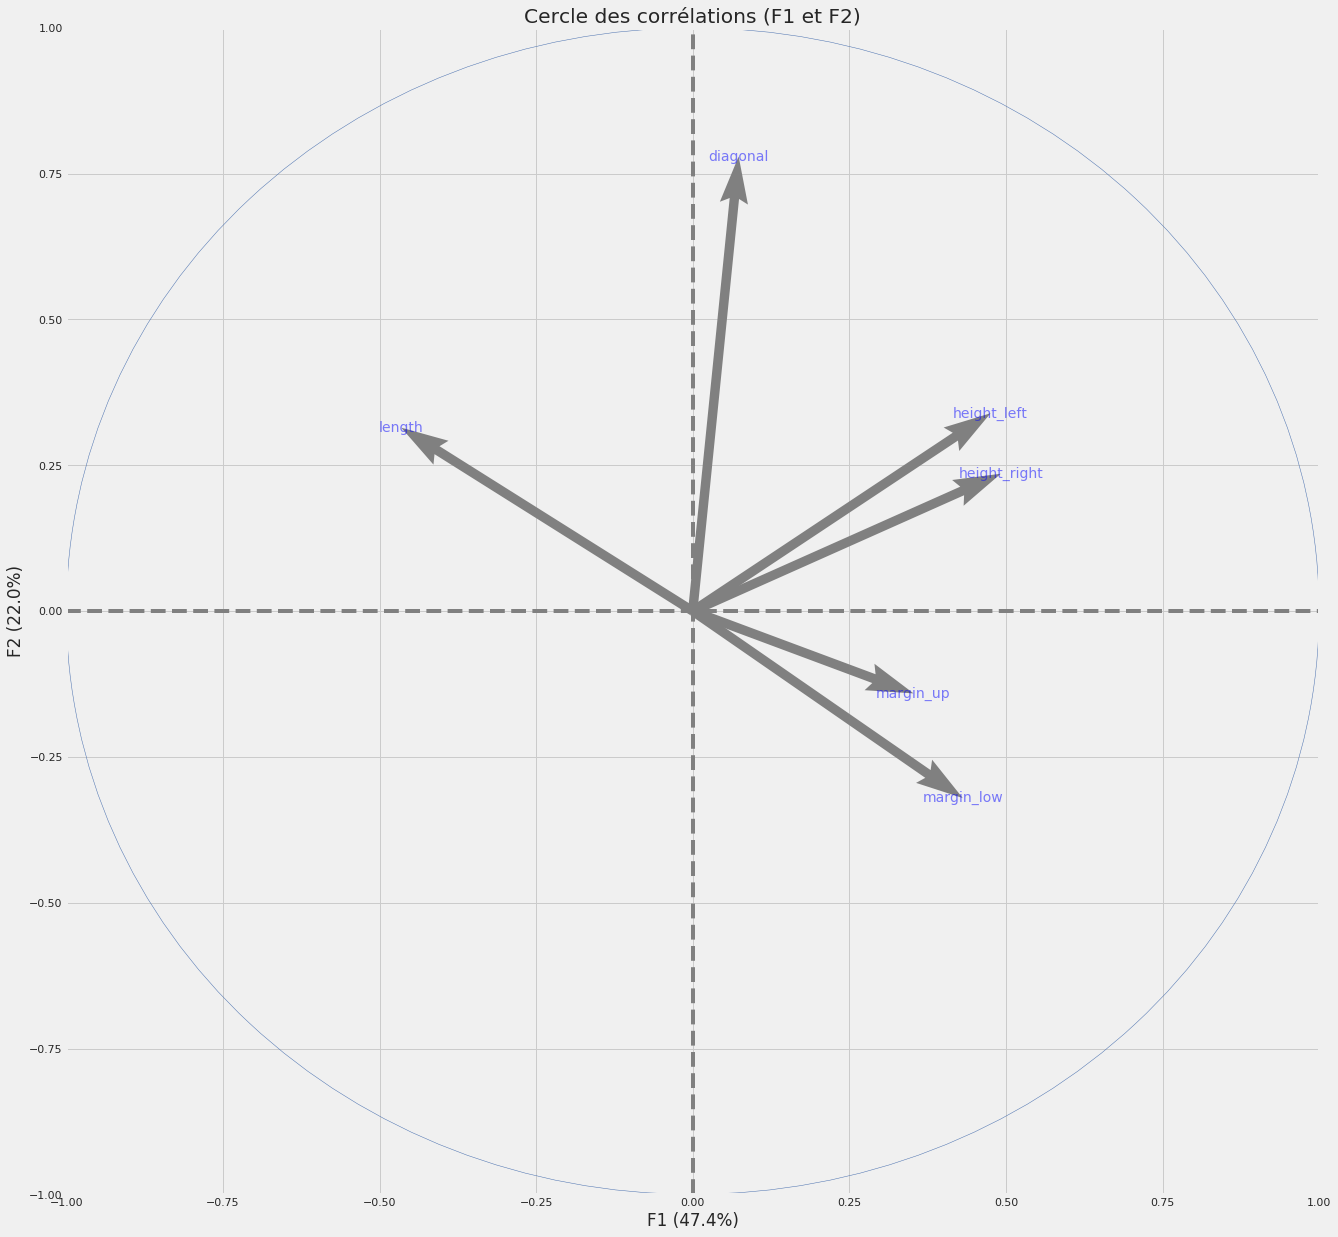

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


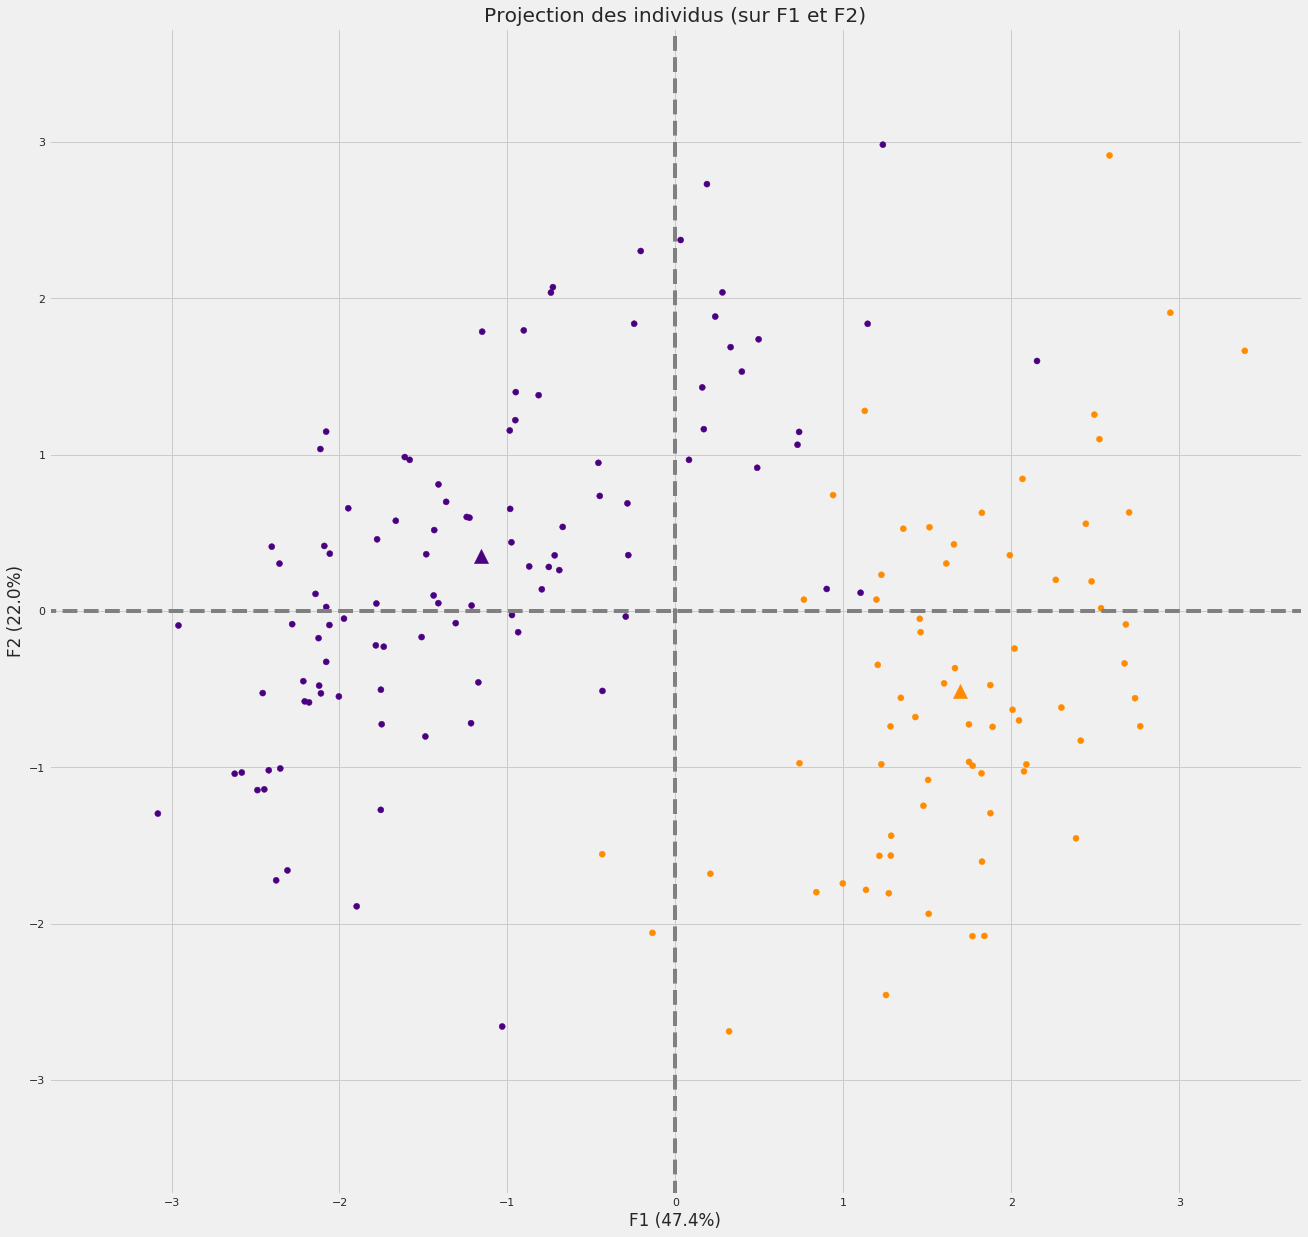

In [54]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1)], df_X['clusters'].astype(int))#, labels

### Calcul de la performance

In [18]:
f"La performance du clustering est de {100 - df_X[df_X['clusters'] == df_Y]['clusters'].count() / df_X['clusters'].count() * 100:0.2f} % après {kmeans.n_iter_} itérations"

'La performance du clustering est de 1.76 % après 4 itérations'

## Partie V - Régression logistique

### Préparation des sets pour le clustering

In [19]:
x = df_X.iloc[:, :-1].astype(int).values.reshape(-1,6)
y = df_Y.astype(int).values

In [20]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(x)
X_scaled = std_scale.transform(x)
#X_sclade = x

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### Entrainement du modèle

In [22]:
model = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train, y_train)

### Predication à l'aide du set de test

In [23]:
y_pred = model.predict(x_test)

### Vérification de la performance

In [24]:
model.score(x_train, y_train)

0.9779411764705882

In [25]:
model.score(x_test, y_test)

0.8823529411764706

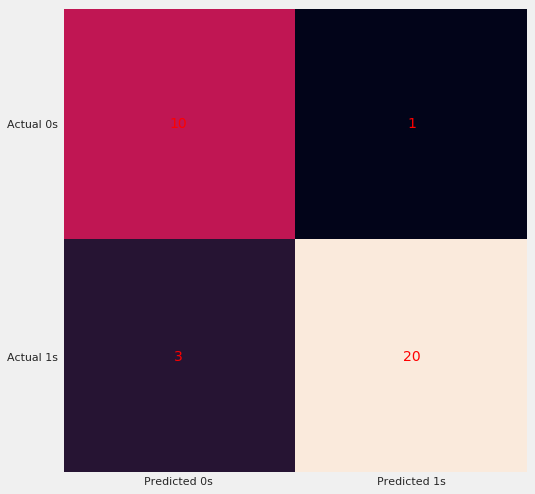

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.95      0.87      0.91        23

    accuracy                           0.88        34
   macro avg       0.86      0.89      0.87        34
weighted avg       0.89      0.88      0.88        34



In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.95      0.87      0.91        23

    accuracy                           0.88        34
   macro avg       0.86      0.89      0.87        34
weighted avg       0.89      0.88      0.88        34



In [31]:
model.classes_

array([0, 1])

In [32]:
model.intercept_

array([0.54762493])

In [33]:
model.coef_

array([[ 0.72799657, -0.60456352, -0.52059375, -1.81500623, -0.53533497,
         2.37449107]])

In [34]:
model.predict_proba(x)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [35]:
model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
model.score(x, y)

0.5882352941176471

In [38]:
metrics.confusion_matrix(y, model.predict(x))

array([[  0,  70],
       [  0, 100]])

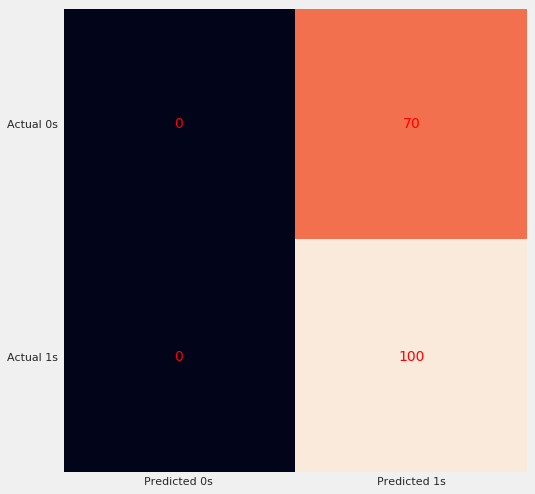

In [40]:
cm = metrics.confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [42]:
print(metrics.classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.59      1.00      0.74       100

    accuracy                           0.59       170
   macro avg       0.29      0.50      0.37       170
weighted avg       0.35      0.59      0.44       170



/home/heidoji/DataScience/Anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [45]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.3429971702850177

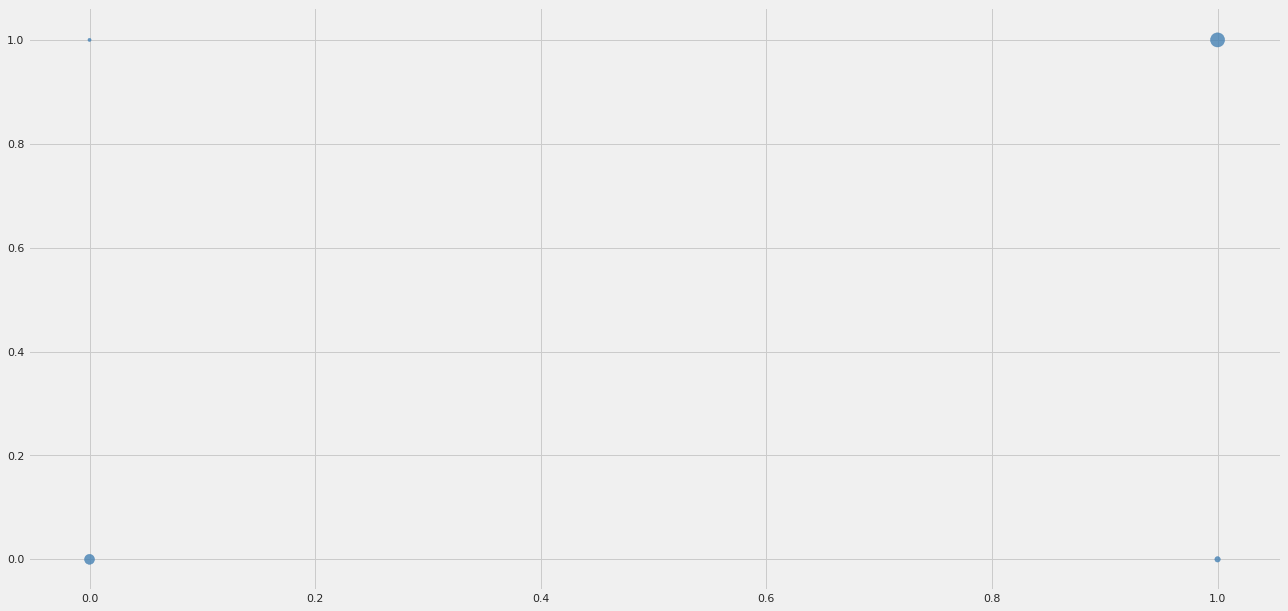

In [50]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 10
    else:
        sizes[(yt, yp)] = 10

        
fig, axes = plt.subplots(figsize = (20, 10))        
keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='steelblue', alpha =0.8)